Goal of the study: Identify the variables with the highest impact on the final house price

## Exploratory Data Analysis

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import QuantileTransformer

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

### Import dataset

In [2]:
df = pd.read_excel('Data_MidTerm_Project_Real_State_Regression.xls')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Columns type

In [3]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

### Checking NULL values

In [4]:
display(df.isnull().sum())

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

**drop id column**

In [5]:
df = df.drop(['id'], axis=1)
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Checking Columns

In [6]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
df['bathrooms'].value_counts()
#do we need to round the data?

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [8]:
df['floors'].value_counts()
#confirm the meaning no of floors per properties or location of flat

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [9]:
#df['waterfront'].np.astype= 'category'
df['waterfront'].dtypes

dtype('int64')

In [10]:
#need to clarify the meaning
df['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [11]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [12]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [13]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [14]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [16]:
df['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [17]:
df['sqft_lot15'].value_counts()

5000     427
4000     356
6000     288
7200     210
4800     145
        ... 
10170      1
10573      1
11477      1
1449       1
2007       1
Name: sqft_lot15, Length: 8682, dtype: int64

In [18]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [19]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

Understanding the difference between sqft_living' and 'sqft_living15.  
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

In [20]:
df_size = df.filter(['sqft_living', 'sqft_above', 'sqft_lot', 'sqft_living15', 'sqft_lot15'])
df_size

,sqft_living,sqft_above,sqft_lot,sqft_living15,sqft_lot15
0,1180,1180,5650,1340,5650
1,2570,2170,7242,1690,7639
2,770,770,10000,2720,8062
3,1960,1050,5000,1360,5000
4,1680,1680,8080,1800,7503
...,...,...,...,...,...
21592,1530,1530,1131,1530,1509
21593,2310,2310,5813,1830,7200
21594,1020,1020,1350,1020,2007
21595,1600,1600,2388,1410,1287


In [21]:
df_size.describe()

,sqft_living,sqft_above,sqft_lot,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,2080.321850,1788.596842,1.509941e+04,1986.620318,12758.283512
std,918.106125,827.759761,4.141264e+04,685.230472,27274.441950
min,370.000000,370.000000,5.200000e+02,399.000000,651.000000
25%,1430.000000,1190.000000,5.040000e+03,1490.000000,5100.000000
50%,1910.000000,1560.000000,7.618000e+03,1840.000000,7620.000000
75%,2550.000000,2210.000000,1.068500e+04,2360.000000,10083.000000
max,13540.000000,9410.000000,1.651359e+06,6210.000000,871200.000000


<AxesSubplot:xlabel='grade', ylabel='price'>

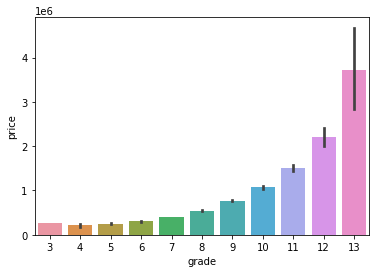

In [22]:
sns.barplot(x = df['grade'],y = df['price'])

## Cleaning 

### Removing outliers

In [23]:
## Droping sqft_above because of high correlation:
df.drop(['sqft_above'],axis=1,inplace=True)

In [24]:
##Bedrooms

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

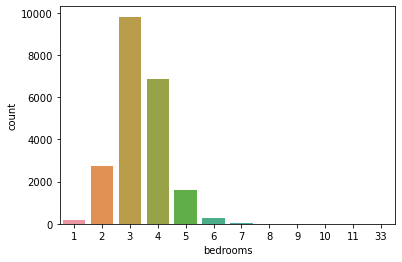

In [25]:
sns.countplot(df['bedrooms'])


In [63]:
df['bedrooms'].value_counts()

3     8910
4     6035
2     2601
5     1392
6      243
1      172
7       33
8       12
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
df.loc

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

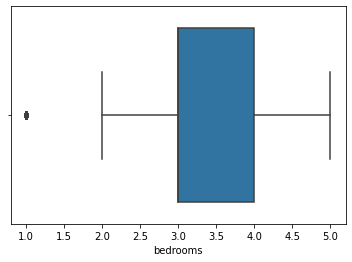

In [26]:
Q1_bedrooms = np.percentile(df['bedrooms'], 25)
Q3_bedrooms = np.percentile(df['bedrooms'], 75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

df_clean = df[(df['bedrooms']  < (Q3_bedrooms+1.5*IQR_bedrooms))]
df_clean
sns.boxplot(df_clean['bedrooms'])

In [27]:
df_clean['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
1     196
Name: bedrooms, dtype: int64

In [28]:
df_clean =df_clean.reset_index(drop=True)

In [29]:
## sqft_living

In [30]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living'>

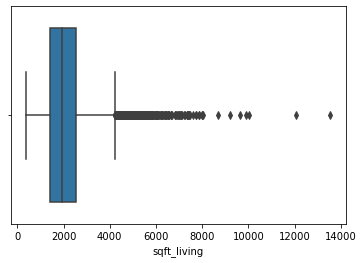

In [31]:
sns.boxplot(df['sqft_living'])

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21015, dtype: int64

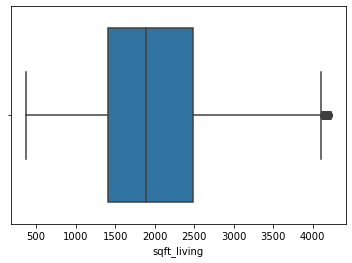

In [32]:

Q1_sqft_living = np.percentile(df['sqft_living'], 25)
Q3_sqft_living = np.percentile(df['sqft_living'], 75)
IQR_sqft_living = Q3_sqft_living - Q1_sqft_living

df_clean =df[(df['sqft_living']  < (Q3_sqft_living+1.5*IQR_sqft_living))]
df_clean
sns.boxplot(df_clean['sqft_living'])
df_clean['sqft_living']

In [33]:
df_clean =df_clean.reset_index(drop=True)

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot'>

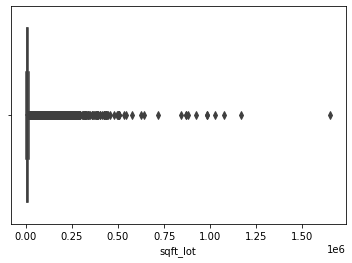

In [34]:
### sqft_lot
sns.boxplot(df['sqft_lot'])

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21592     1131
21593     5813
21594     1350
21595     2388
21596     1076
Name: sqft_lot, Length: 19079, dtype: int64

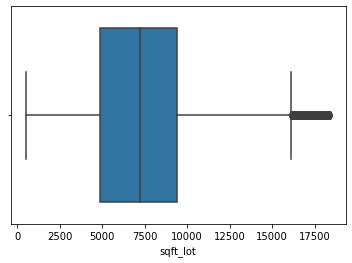

In [35]:

Q1_sqft_lot = np.percentile(df_clean['sqft_lot'], 25)
Q3_sqft_lot = np.percentile(df_clean['sqft_lot'], 75)
IQR_sqft_lot = Q3_sqft_lot - Q1_sqft_lot

df_clean = df[(df['sqft_lot']  < (Q3_sqft_lot+1.5*IQR_sqft_lot))]
df_clean
sns.boxplot(df_clean['sqft_lot'])
df_clean['sqft_lot']

In [36]:
df_clean =df_clean.reset_index(drop=True)

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_basement'>

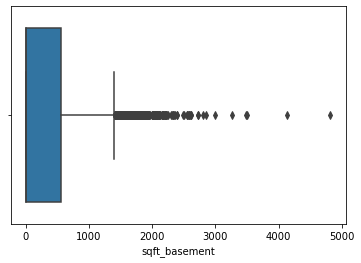

In [37]:
### sqft_basement
sns.boxplot(df['sqft_basement'])

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21022, dtype: int64

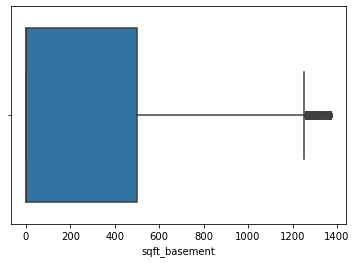

In [38]:

Q1_sqft_basement = np.percentile(df_clean['sqft_basement'], 25)
Q3_sqft_basement = np.percentile(df_clean['sqft_basement'], 75)
IQR_sqft_basement= Q3_sqft_basement - Q1_sqft_basement

df_clean = df[(df['sqft_basement']  < (Q3_sqft_basement+1.5*IQR_sqft_basement))]
df_clean
sns.boxplot(df_clean['sqft_basement'])
df_clean['sqft_basement']

In [39]:
df_clean =df_clean.reset_index(drop=True)

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living15'>

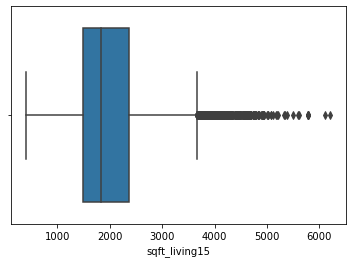

In [40]:
### sqft_living 15
sns.boxplot(df['sqft_living15'])

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0        1340
1        1690
2        2720
3        1360
4        1800
         ... 
21592    1530
21593    1830
21594    1020
21595    1410
21596    1020
Name: sqft_living15, Length: 20963, dtype: int64

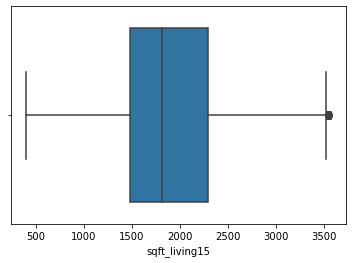

In [41]:

Q1_sqft_living15 = np.percentile(df_clean['sqft_living15'], 25)
Q3_sqft_living15 = np.percentile(df_clean['sqft_living15'], 75)
IQR_sqft_living15 = Q3_sqft_living15 - Q1_sqft_living15

df_clean = df[(df['sqft_living15']  < (Q3_sqft_living15+1.5*IQR_sqft_living15))]
df_clean
sns.boxplot(df_clean['sqft_living15'])
df_clean['sqft_living15']

In [42]:
df_clean =df_clean.reset_index(drop=True)

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot15'>

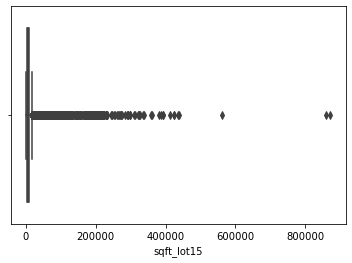

In [43]:
### sqft_lot15
sns.boxplot(df['sqft_lot15'])

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0        5650
1        7639
2        8062
3        5000
4        7503
         ... 
21592    1509
21593    7200
21594    2007
21595    1287
21596    1357
Name: sqft_lot15, Length: 19409, dtype: int64

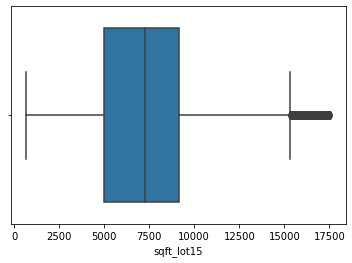

In [44]:

Q1_sqft_lot15 = np.percentile(df['sqft_lot15'], 25)
Q3_sqft_lot15 = np.percentile(df['sqft_lot15'], 75)
IQR_sqft_lot15 = Q3_sqft_lot15 - Q1_sqft_lot15

df_clean = df[(df['sqft_lot15']  < (Q3_sqft_lot15+1.5*IQR_sqft_lot15))]
df_clean
sns.boxplot(df_clean['sqft_lot15'])
df_clean['sqft_lot15']


In [45]:
df_clean =df_clean.reset_index(drop=True)
df=df_clean

In [ ]:
## Removing outliers from categorical variables

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='count'>

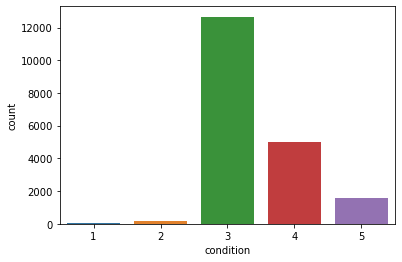

In [61]:
sns.countplot(df['condition'])

### Changing columns type into categorical variables

In [46]:
df['waterfront'] = pd.Categorical(df['waterfront'])
df['view'] = pd.Categorical(df['view'])
df['condition'] = pd.Categorical(df['condition'])
df['grade'] = pd.Categorical(df['grade'])

In [47]:
df.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [48]:
categorical = df.select_dtypes(include = ['category'])
categorical

,waterfront,view,condition,grade
0,0,0,3,7
1,0,0,3,7
2,0,0,3,6
3,0,0,5,7
4,0,0,3,8
...,...,...,...,...
19404,0,0,3,8
19405,0,0,3,8
19406,0,0,3,7
19407,0,0,3,8


### Ordinal columns

In [49]:
categorical_ord = categorical[["waterfront", "view","condition","grade"]]
categories = [["0","1"], ["0", "1", "2","3","4"],["1","2","3","4","5"],
              ["1","2","3","4","5","6","7","8","9","10","11","12","13"]]

In [50]:
ordinal_encoder = OrdinalEncoder(categories=categories)
categorical_ord_encoded = pd.DataFrame(ordinal_encoder.fit_transform(categorical_ord),columns=categorical_ord.columns)

In [51]:
categorical_ord_encoded

,waterfront,view,condition,grade
0,0.0,0.0,2.0,6.0
1,0.0,0.0,2.0,6.0
2,0.0,0.0,2.0,5.0
3,0.0,0.0,4.0,6.0
4,0.0,0.0,2.0,7.0
...,...,...,...,...
19404,0.0,0.0,2.0,7.0
19405,0.0,0.0,2.0,7.0
19406,0.0,0.0,2.0,6.0
19407,0.0,0.0,2.0,7.0


**Filtering the numerical variables:**

In [52]:
numerical = df.select_dtypes(include = ['int64', 'float'])
numerical

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19404,3,2.50,1530,1131,3.0,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
19405,4,2.50,2310,5813,2.0,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
19406,2,0.75,1020,1350,2.0,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
19407,3,2.50,1600,2388,2.0,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Distributions of numeric features

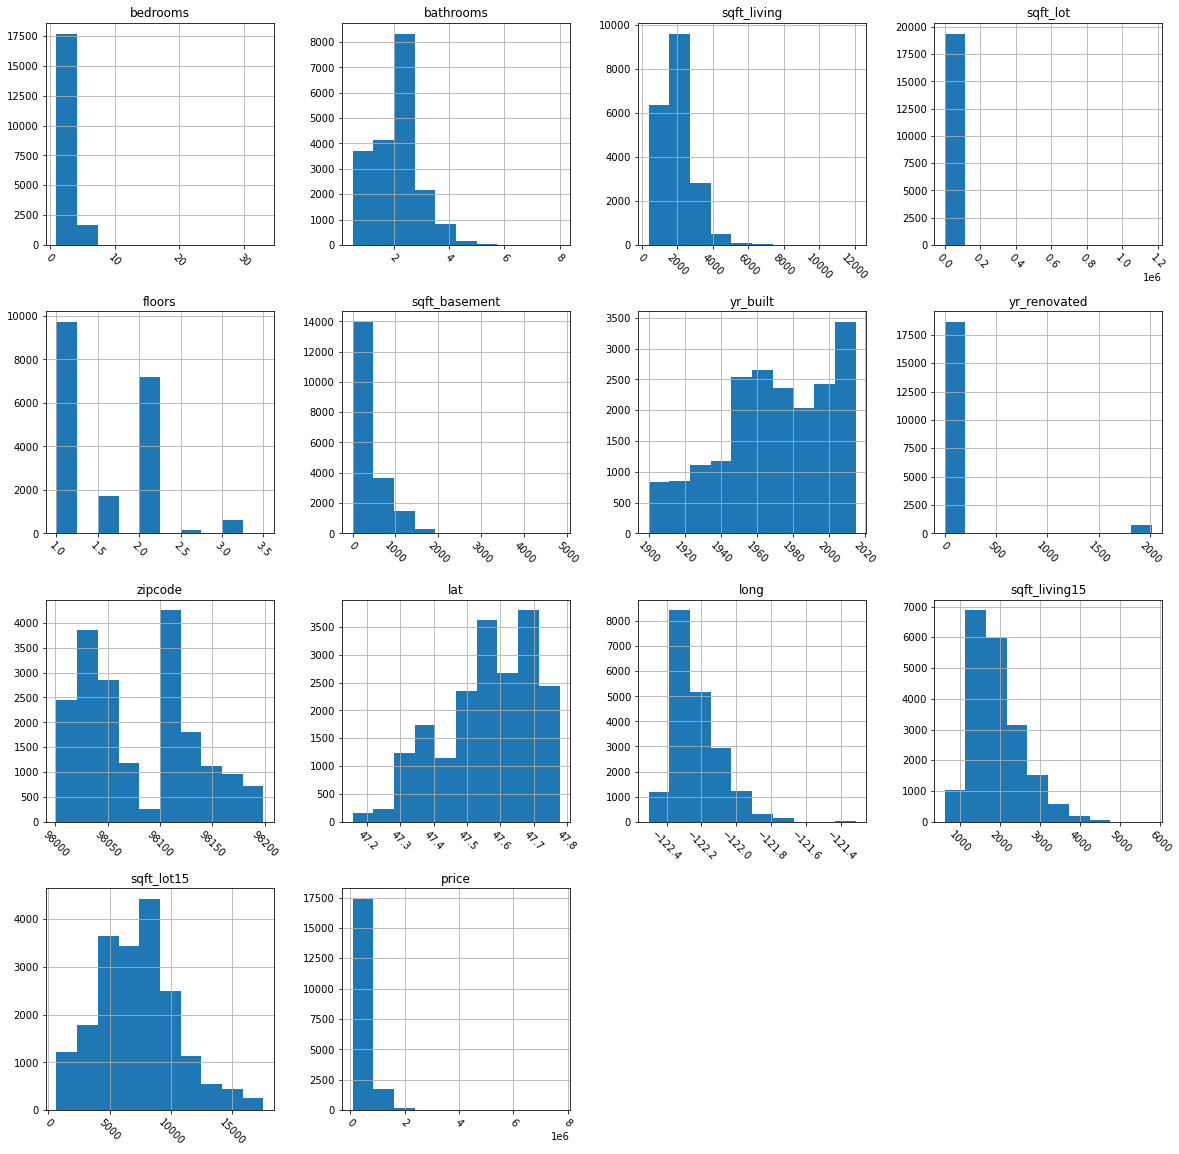

In [53]:
# Plot histogram grid
numerical.hist(figsize=(20,20), xrot=-45)
plt.show()

**Observations**:
- no Null value was detected

### Distribution of categorical variables

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


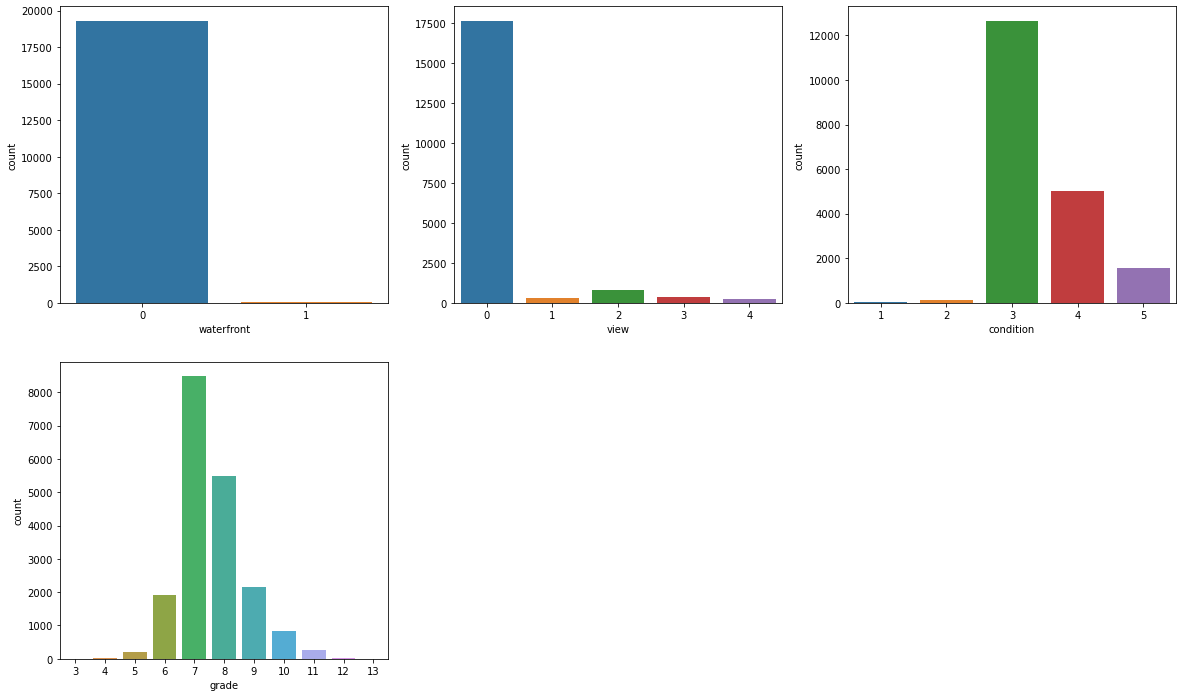

In [54]:
plt.figure(figsize=(20,12))
for i, column in enumerate(categorical,1):
    plt.subplot(2,3,i)
    sns.countplot(categorical[column])

**Observations**
- majority of properties has no view to waterfront
- majority of properties has a very low score in 'view' 
- most of properties has an average condition
- distribution of grade scoring of properties is near to normal

### Correlation of numerical variables

<AxesSubplot:>

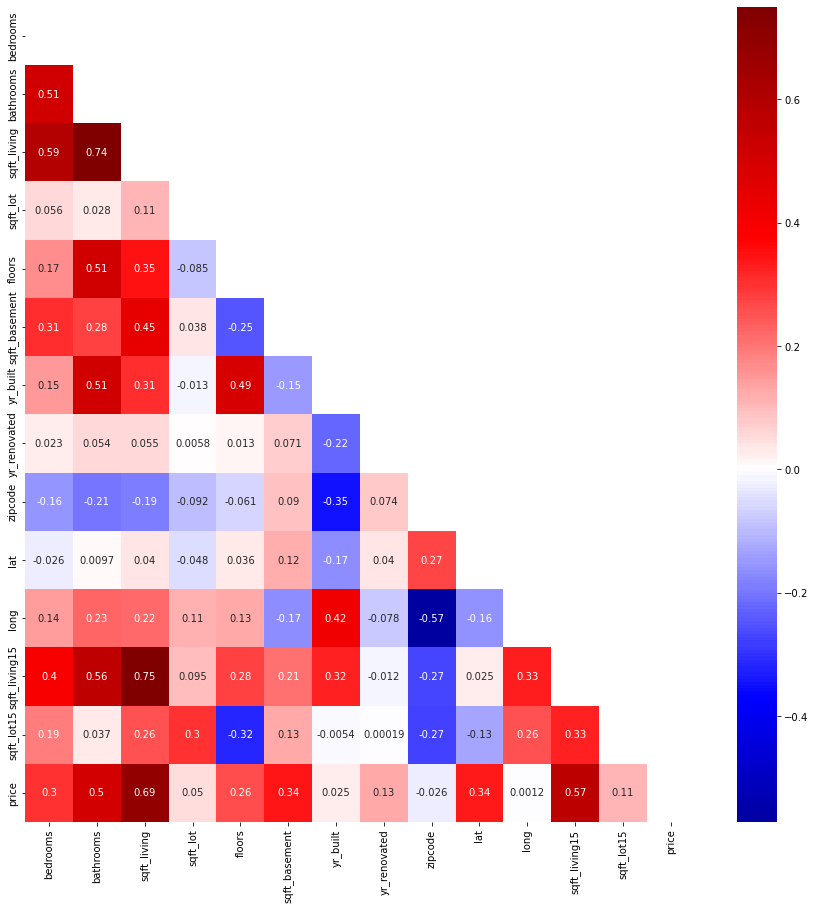

In [55]:
corr = numerical.corr()
fig, ax = plt.subplots(figsize=(15,15))
mask=np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)

**Observations**:
- sqft_above and sqft_living > 0.80
- (?) sqft_living15 and sqft_living = 0.76
- (?) sqft_lot and sqft_lot15 = 0.72

### Correlation of categorical variables

<AxesSubplot:xlabel='waterfront', ylabel='price'>

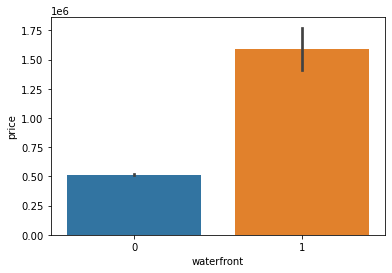

In [56]:
sns.barplot(x = df['waterfront'],y = df['price'])

<AxesSubplot:xlabel='view', ylabel='price'>

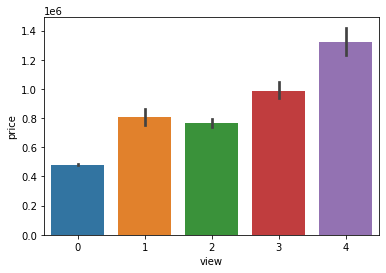

In [57]:
sns.barplot(x = df['view'],y = df['price'])

<AxesSubplot:xlabel='condition', ylabel='price'>

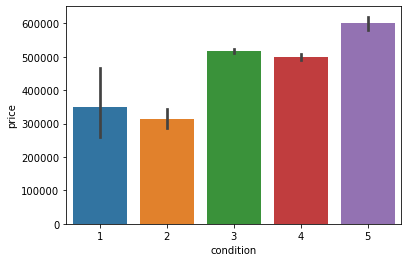

In [58]:
sns.barplot(x = df['condition'],y = df['price'])

In [59]:
###Standardize numerical data
z_score_numerical = (numerical-numerical.mean())/numerical.std()

ValueError: num must be 1 <= num <= 12, not 13

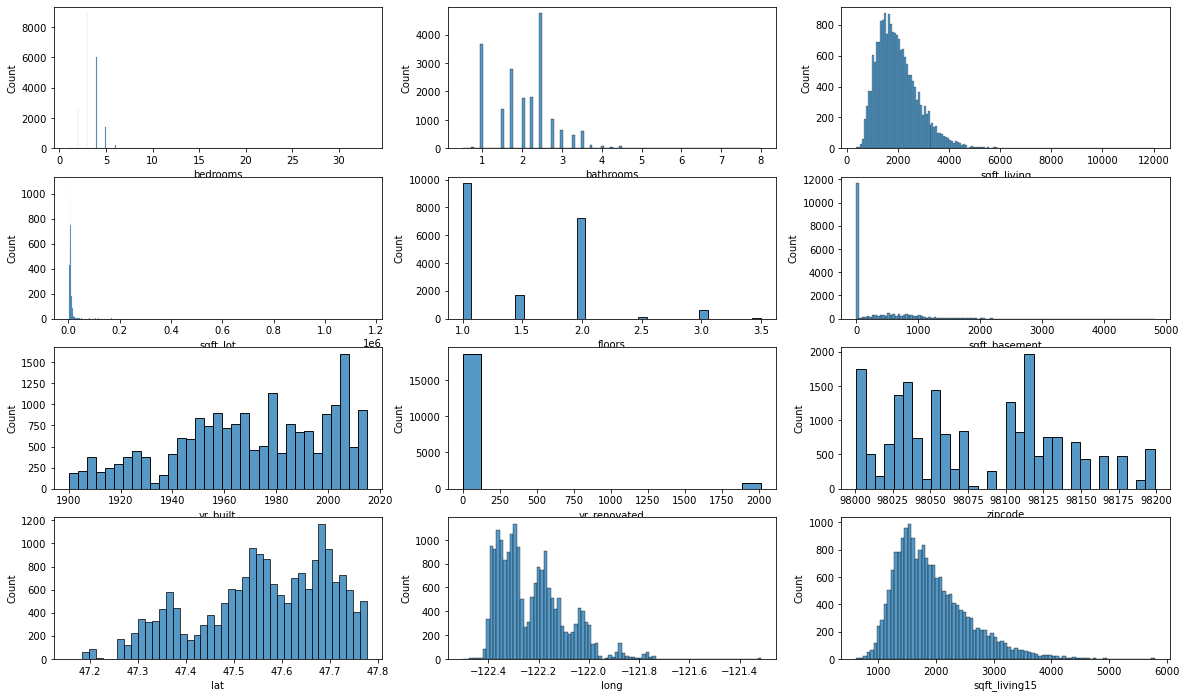

In [60]:
plt.figure(figsize=(20,12))
for i, column in enumerate(numerical.columns,1):
    plt.subplot(4,3,i)
    sns.histplot(numerical[column])

In [ ]:
##bedrooms, bathrooms,year, 

In [ ]:
sns.barplot(x = df['yr_reno'],y = df['price'])